In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
!pip install langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7396b7ded715c964d9aaf88eefb7561f256b39085b3e3d360ab132b316cf4655
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import string
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [5]:
df1.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
path = "/content/drive/MyDrive/Colab Notebooks/research topic prediction/"
df= pd.read_excel(path + "data/Train.2 (1).xlsx")
df.shape

(15336, 31)

In [14]:
test_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/research topic prediction/data/Test.csv')
test_df.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


In [15]:
#training data's share and name of columns
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (15336, 31)
Columns are: Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')


In [16]:

url_pattern = re.compile(r'https?://\S+|www\.\S+')

new_line_pattern = re.compile(r"\n+\S*")
## text transformation
contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}



In [18]:
def remove_url(string):
    return url_pattern.sub(r'', string)



PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))



In [19]:
def clean_message(message):

    # Remove urls
    message = remove_url(message)  

    # Change new line to dot
    message = new_line_pattern.sub(r'.', message)
    
    # Remove punctuation
    message = remove_punctuation(message)
    
    # Remove start and end whitespace
    message = message.strip()
    
    # Make multiple spaces become a single space
    message = ' '.join(message.split())
    
    # Lower case the message
    message = message.lower()
    
    return message



df['cleaned_text'] = df.apply(lambda row: clean_message(row['ABSTRACT']), axis=1)            #cleaning training data

In [20]:
test_df['cleaned_text'] = test_df.apply(lambda row: clean_message(row['ABSTRACT']), axis=1) #cleaning test data

In [21]:
print("before cleaning STORY")
print(test_df.ABSTRACT[1])
print("After cleaning story")
print(test_df.cleaned_text[1])


before cleaning STORY
this large-scale study, consisting of 24.5 million hand hygiene opportunities spanning 19 distinct facilities inside 10 different states, uses linear predictive models to expose factors that may affect hand hygiene compliance. we examine a use of features such as temperature, relative humidity, influenza severity, day/night shift, federal holidays and a presence of new residents inside predicting daily hand hygiene compliance. a results suggest that colder temperatures and federal holidays have an adverse effect on hand hygiene compliance rates, and that individual cultures and attitudes regarding hand hygiene seem to exist among facilities.
After cleaning story
this largescale study consisting of 245 million hand hygiene opportunities spanning 19 distinct facilities inside 10 different states uses linear predictive models to expose factors that may affect hand hygiene compliance we examine a use of features such as temperature relative humidity influenza severity

In [22]:
print("before cleaning STORY")
print(df.cleaned_text[1])
print("After cleaning story")
print(df.ABSTRACT[1])


before cleaning STORY
we propose the framework considering optimal tmatchings excluding a prescribed tfactors inside bipartite graphs a proposed framework was the generalization of a nonbipartite matching problem and includes several problems such as a trianglefree 2matching squarefree 2matching even factor and arborescence problems inside this paper we demonstrate the unified understanding of these problems by commonly extending previous important results we solve our problem under the reasonable assumption which was sufficiently broad to include a specific problems listed above we first present the minmax theorem and the combinatorial algorithm considering a unweighted version we then provide the linear programming formulation with dual integrality and the primaldual algorithm considering a weighted version the key ingredient of a proposed algorithm was the technique to shrink forbidden structures which corresponds to a techniques of shrinking odd cycles triangles squares and directe

In [23]:
stop_words = stopwords.words('english')

# Remove stop words from training data
df['cleaned_text'] = df['cleaned_text'].str.split().apply(lambda x: [word for word in x if word not in stop_words]).apply(lambda x: ' '.join(x))

In [24]:
# Remove stop words from test data
test_df['cleaned_text'] = test_df['cleaned_text'].str.split().apply(lambda x: [word for word in x if word not in stop_words]).apply(lambda x: ' '.join(x))

In [25]:
print("before removieing stopwords: ",test_df['ABSTRACT'][1])
print("After removieing stopwords: ",test_df['cleaned_text'][1])

before removieing stopwords:  this large-scale study, consisting of 24.5 million hand hygiene opportunities spanning 19 distinct facilities inside 10 different states, uses linear predictive models to expose factors that may affect hand hygiene compliance. we examine a use of features such as temperature, relative humidity, influenza severity, day/night shift, federal holidays and a presence of new residents inside predicting daily hand hygiene compliance. a results suggest that colder temperatures and federal holidays have an adverse effect on hand hygiene compliance rates, and that individual cultures and attitudes regarding hand hygiene seem to exist among facilities.
After removieing stopwords:  largescale study consisting 245 million hand hygiene opportunities spanning 19 distinct facilities inside 10 different states uses linear predictive models expose factors may affect hand hygiene compliance examine use features temperature relative humidity influenza severity daynight shift 

In [26]:
print("before removieing stopwords: ",df['ABSTRACT'][1])
print("After removieing stopwords: ",df['cleaned_text'][1])

before removieing stopwords:  we propose the framework considering optimal $t$-matchings excluding a prescribed $t$-factors inside bipartite graphs. a proposed framework was the generalization of a nonbipartite matching problem and includes several problems, such as a triangle-free $2$-matching, square-free $2$-matching, even factor, and arborescence problems. inside this paper, we demonstrate the unified understanding of these problems by commonly extending previous important results. we solve our problem under the reasonable assumption, which was sufficiently broad to include a specific problems listed above. we first present the min-max theorem and the combinatorial algorithm considering a unweighted version. we then provide the linear programming formulation with dual integrality and the primal-dual algorithm considering a weighted version. the key ingredient of a proposed algorithm was the technique to shrink forbidden structures, which corresponds to a techniques of shrinking odd

In [27]:
#frequent words from training data

cnt = Counter()
for text in df["cleaned_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('inside', 45531),
 ('considering', 27442),
 ('data', 8458),
 ('model', 8168),
 ('method', 8144),
 ('learning', 6092),
 ('show', 5803),
 ('results', 5652),
 ('help', 5625),
 ('paper', 5579)]

In [28]:
#frequent words from test data

test_cnt = Counter()
for text in test_df["cleaned_text"].values:
    for word in text.split():
        test_cnt[word] += 1
        
test_cnt.most_common(10)

[('inside', 19667),
 ('considering', 11606),
 ('method', 3460),
 ('model', 3458),
 ('data', 3359),
 ('learning', 2359),
 ('help', 2350),
 ('show', 2329),
 ('results', 2172),
 ('paper', 2143)]

In [29]:
#rare words removal from training data
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

In [30]:
RAREWORDS

{'desntiy',
 'filter”',
 'partialresponse',
 'rs1',
 'stagewise',
 'subtracts',
 'x1…',
 'x∈rd',
 '“matched',
 '“typical”“random”'}

In [31]:
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: remove_rarewords(text))

In [32]:
#rare words removal from test data
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in test_cnt.most_common()[:-n_rare_words-1:-1]])
test_df["cleaned_text"] = test_df["cleaned_text"].apply(lambda text: remove_rarewords(text))

In [33]:
print("Before lemmatization : ",df['cleaned_text'][1])

Before lemmatization :  propose framework considering optimal tmatchings excluding prescribed tfactors inside bipartite graphs proposed framework generalization nonbipartite matching problem includes several problems trianglefree 2matching squarefree 2matching even factor arborescence problems inside paper demonstrate unified understanding problems commonly extending previous important results solve problem reasonable assumption sufficiently broad include specific problems listed first present minmax theorem combinatorial algorithm considering unweighted version provide linear programming formulation dual integrality primaldual algorithm considering weighted version key ingredient proposed algorithm technique shrink forbidden structures corresponds techniques shrinking odd cycles triangles squares directed cycles inside edmonds blossom algorithm trianglefree 2matching algorithm squarefree 2matching algorithm arborescence algorithm respectively


In [34]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: lemmatize_words(text))       #lemmiatize training data

print("After lemmatization : ",df['cleaned_text'][1])      

After lemmatization :  propose framework consider optimal tmatchings exclude prescribed tfactors inside bipartite graph propose framework generalization nonbipartite match problem include several problem trianglefree 2matching squarefree 2matching even factor arborescence problem inside paper demonstrate unify understanding problem commonly extend previous important result solve problem reasonable assumption sufficiently broad include specific problem list first present minmax theorem combinatorial algorithm consider unweighted version provide linear program formulation dual integrality primaldual algorithm consider weighted version key ingredient propose algorithm technique shrink forbidden structure correspond technique shrink odd cycle triangle square direct cycle inside edmonds blossom algorithm trianglefree 2matching algorithm squarefree 2matching algorithm arborescence algorithm respectively


In [35]:
test_df["cleaned_text"] = test_df["cleaned_text"].apply(lambda text: lemmatize_words(text)) #lemmiatize test data

In [36]:
df

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,cleaned_text
0,1824.0,a ever-growing datasets inside observational a...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,evergrowing datasets inside observational astr...
1,3094.0,we propose the framework considering optimal $...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,propose framework consider optimal tmatchings ...
2,8463.0,nanostructures with open shell transition meta...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nanostructures open shell transition metal mol...
3,2082.0,stars are self-gravitating fluids inside which...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,star selfgravitating fluid inside pressure buo...
4,8687.0,deep neural perception and control networks ar...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,deep neural perception control network likely ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15331,NaN,This paper is concerned with inequalities conn...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,paper concern inequality connect probability h...
15332,NaN,A maximum-likelihood sequence estimator for a ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,maximumlikelihood sequence estimator digital p...
15333,NaN,Finding the sparsest solution to underdetermin...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,find sparse solution underdetermined system li...
15334,NaN,"Let \nƒ\n be a probability density function, x...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,let probability density function shannon diffe...


In [39]:
df = df.drop(['id', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'], axis = 1)
df.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,cleaned_text
0,a ever-growing datasets inside observational a...,0.0,0.0,1.0,0.0,evergrowing datasets inside observational astr...
1,we propose the framework considering optimal $...,1.0,0.0,0.0,0.0,propose framework consider optimal tmatchings ...
2,nanostructures with open shell transition meta...,0.0,0.0,1.0,0.0,nanostructures open shell transition metal mol...
3,stars are self-gravitating fluids inside which...,0.0,0.0,1.0,0.0,star selfgravitating fluid inside pressure buo...
4,deep neural perception and control networks ar...,1.0,0.0,0.0,0.0,deep neural perception control network likely ...


In [47]:
df = df.append(test_df)
df.shape

(27340, 7)

In [44]:
df = df.drop(['id'], axis=1)

In [45]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/research topic prediction/data/train_df_extend.csv', index=False)

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/research topic prediction/data/train_df_extend.csv')
df.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,cleaned_text
0,a ever-growing datasets inside observational a...,0.0,0.0,1.0,0.0,evergrowing datasets inside observational astr...
1,we propose the framework considering optimal $...,1.0,0.0,0.0,0.0,propose framework consider optimal tmatchings ...
2,nanostructures with open shell transition meta...,0.0,0.0,1.0,0.0,nanostructures open shell transition metal mol...
3,stars are self-gravitating fluids inside which...,0.0,0.0,1.0,0.0,star selfgravitating fluid inside pressure buo...
4,deep neural perception and control networks ar...,1.0,0.0,0.0,0.0,deep neural perception control network likely ...


In [50]:
df.loc[(df['Computer Science']==1)
               , 'label'] = 'Computer Science'

df.loc[(df['Mathematics']==1)
               , 'label'] = 'Mathematics'


df.loc[(df['Physics']==1)
               , 'label'] = 'Physics'
               
df.loc[(df['Statistics']==1)
               , 'label'] = 'Statistics'  

df.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,cleaned_text,label
0,a ever-growing datasets inside observational a...,0.0,0.0,1.0,0.0,evergrowing datasets inside observational astr...,Physics
1,we propose the framework considering optimal $...,1.0,0.0,0.0,0.0,propose framework consider optimal tmatchings ...,Computer Science
2,nanostructures with open shell transition meta...,0.0,0.0,1.0,0.0,nanostructures open shell transition metal mol...,Physics
3,stars are self-gravitating fluids inside which...,0.0,0.0,1.0,0.0,star selfgravitating fluid inside pressure buo...,Physics
4,deep neural perception and control networks ar...,1.0,0.0,0.0,0.0,deep neural perception control network likely ...,Computer Science


In [57]:
df.label.value_counts().sort_values()

Mathematics         3357
Statistics          5580
Physics             5945
Computer Science    6451
Name: label, dtype: int64

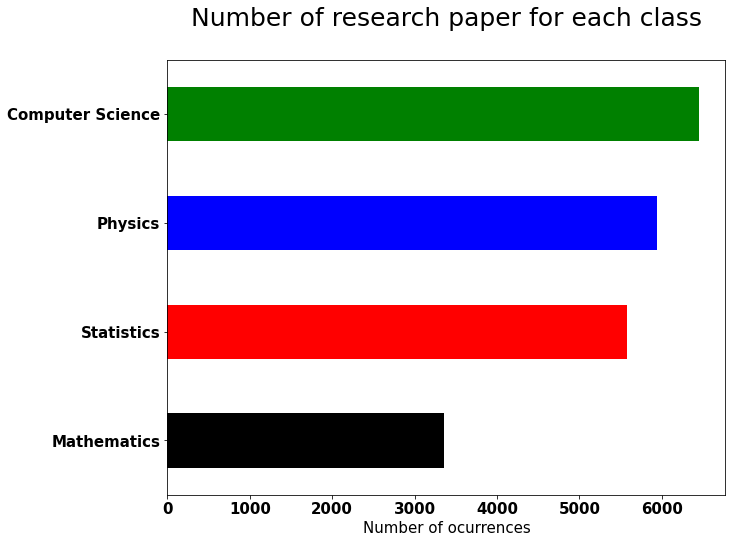

In [72]:
# df['label'].plot(kind="bar", color=['black', 'red', 'blue', 'green'])
fig = plt.figure(figsize=(10,8))
colors = ['black', 'red', 'blue', 'green']
df.label.value_counts().sort_values().plot.barh(
    ylim=0, color=colors)
plt.title('Number of research paper for each class\n', fontsize=25)
plt.xlabel('Number of ocurrences', fontsize = 15)
plt.yticks( rotation=0, weight = 'bold')
plt.xticks( rotation=0, weight = 'bold') 
plt.tick_params(rotation=0, axis='x', labelsize=15)
plt.tick_params(rotation=0,axis='y', labelsize=15);

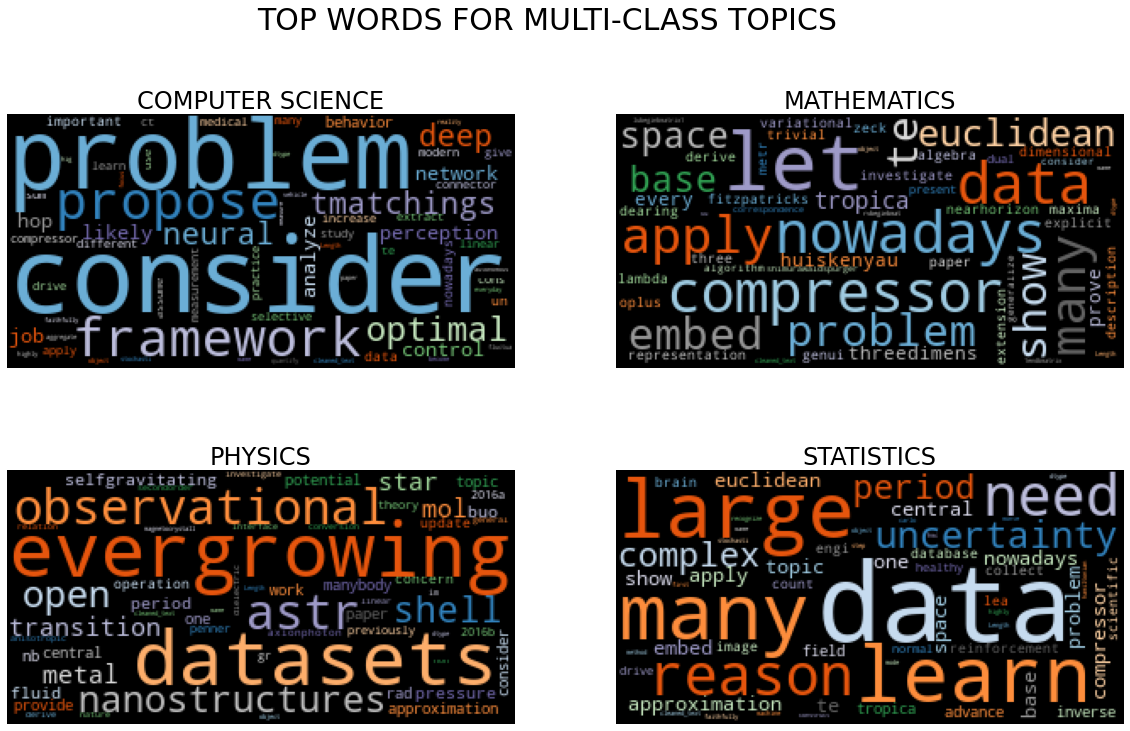

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 42,width=300, height=150, max_words=100,colormap='tab20c',collocations=True)
for i, sub_topic_name in enumerate(['Computer Science', 'Mathematics', 'Physics', 'Statistics']):
  sub_topic = df[df[sub_topic_name] == 1]
  text = str(sub_topic['cleaned_text'])
  op = wc.generate(text)
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR MULTI-CLASS TOPICS', fontsize=30)

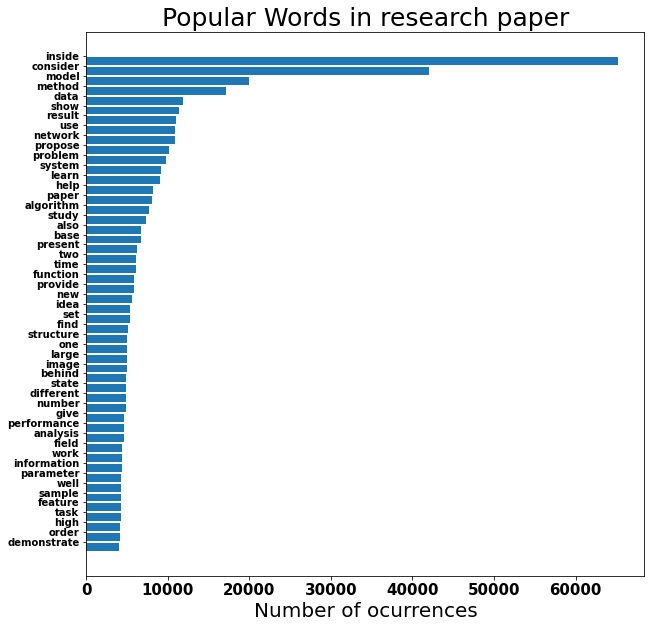

In [76]:
#frequent words
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title, fontsize=25)
    plt.xlabel('Number of ocurrences', fontsize = 20)
    # plt.xlabel('Number of ocurrences', fontsize = 15)
    plt.yticks( rotation=0, weight = 'bold')
    plt.xticks( rotation=0, weight = 'bold') 
    plt.tick_params(rotation=0, axis='x', labelsize=15)
    plt.tick_params(rotation=0,axis='y', labelsize=10);
    plt.show()

plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'cleaned_text',"Popular Words in research paper")